In [1]:
import pickle
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

from utils import languages, sentences_by_lang, get_trigrams_sets, encode, prepare_dataframe, normalize, \
    FFN_Hyperparams, build_model, create_encoder, test_model, create_feature_dictionary, get_words_set, DataGenerator
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
print(languages)
print(sentences_by_lang)

['eng', 'deu', 'spa', 'ita', 'por']
200000


### Przygotowanie danych

In [3]:
df = prepare_dataframe()

In [4]:
all_words = get_words_set(df)

### Bag of words

In [5]:
# Tworzymy bag of words, nie wykorzystujemy binarnego bag of words ponieważ trigramy w zdaniu mogą się powtórzyć i stracilibyśmy tę informację.
# Wadą BoW jest fakt, że każdy trigram jest tak samo ważny, ale w naszym problemie to nie przeszkadza.
dic = create_feature_dictionary(all_words)

vectorizer = CountVectorizer(max_features=800) #ngram_range bierzemy tylko trigramy, analyzer bierzemy pod uwagę znaki,// char_wb nie zliczało poprawnie kolumn
sentences = df["sentence"]
langs = df["lang"]
X = vectorizer.fit_transform(sentences)
# Tworzymy macierz wystąpień poszcególnych trigramów
features = pd.DataFrame(data=X.toarray())

vectorizer.vocabulary_

{'mary': 408,
 'went': 758,
 'back': 60,
 'to': 674,
 'her': 301,
 'is': 339,
 'll': 383,
 'buy': 79,
 'that': 656,
 'when': 764,
 'get': 263,
 'my': 447,
 'next': 466,
 'what': 763,
 'would': 780,
 'tom': 682,
 'do': 156,
 'if': 323,
 'wasn': 749,
 'here': 302,
 'tell': 648,
 'him': 305,
 'he': 298,
 'for': 242,
 'his': 307,
 'with': 775,
 'problem': 540,
 'did': 142,
 'you': 789,
 'told': 681,
 'couldn': 106,
 'about': 4,
 'ziri': 792,
 'there': 660,
 'always': 22,
 'time': 671,
 're': 567,
 'not': 481,
 'she': 601,
 'know': 358,
 'doesn': 159,
 'be': 61,
 'doing': 160,
 'think': 663,
 'we': 751,
 'should': 602,
 'this': 664,
 'more': 438,
 'than': 655,
 'and': 31,
 'don': 162,
 'why': 767,
 'john': 347,
 'want': 742,
 'them': 659,
 'help': 300,
 'algeria': 14,
 'were': 762,
 'too': 686,
 'from': 248,
 'the': 657,
 'knew': 357,
 'didn': 143,
 'who': 766,
 'was': 748,
 'able': 3,
 'come': 96,
 'on': 495,
 'have': 296,
 'it': 344,
 'again': 9,
 'our': 505,
 'good': 271,
 'wants': 744,


### Normalizacja

In [6]:
features = normalize(features)
features["lang"] = list(langs) # dodajemy dodatkową kolumnę z naszym outputem

### Podział na dane testowe i treningowe

In [7]:
encoder = create_encoder()
x = features.drop('lang',axis=1)
y = encode(features['lang'], encoder)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [8]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
display(X_train)
display(y_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799
89625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

### Przygotowanie modelu

In [9]:
params = FFN_Hyperparams(len(X_train.columns), len(languages), [500,500,250], 'relu')
model = build_model(params)

### INFO o urządzeniach

In [10]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### Uruchomienie treningu

In [11]:
# Z użyciem gpu
#with tf.device('/GPU:0'):
#    model.fit(X_train, y_train, epochs=25, batch_size=6)

train_gen = DataGenerator(X_train, y_train, 32)
history = model.fit(train_gen, epochs=6, batch_size=6)

Epoch 1/6
25000/25000 [==============================] - 120s 5ms/step - loss: 0.0960 - accuracy: 0.9588
Epoch 2/6
25000/25000 [==============================] - 115s 5ms/step - loss: 0.0858 - accuracy: 0.9624
Epoch 3/6
25000/25000 [==============================] - 111s 4ms/step - loss: 0.0828 - accuracy: 0.9631
Epoch 4/6
25000/25000 [==============================] - 116s 5ms/step - loss: 0.0823 - accuracy: 0.9637
Epoch 5/6
25000/25000 [==============================] - 110s 4ms/step - loss: 0.0859 - accuracy: 0.9640
Epoch 6/6
25000/25000 [==============================] - 111s 4ms/step - loss: 0.0802 - accuracy: 0.9642


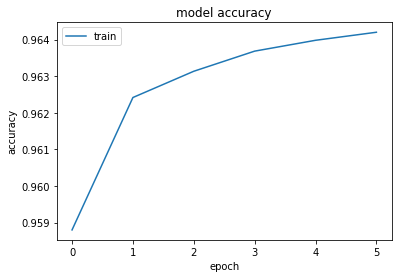

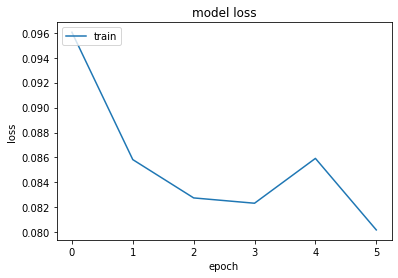

In [12]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Test precyzji

In [13]:
accuracy = test_model(model, encoder, X_test, y_test)

6250/6250 [==============================] - 9s 1ms/step


In [14]:
print("Accuracy: ", accuracy)
if accuracy > 0.8:
    model.save("words_recognition")
    with open('words_encoder.pkl', 'wb') as f:
        pickle.dump(encoder, f)
    with open('words_vectorizer.pkl', 'wb') as f:
        pickle.dump(vectorizer, f)

Accuracy:  0.963635
INFO:tensorflow:Assets written to: words_recognition\assets
